In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
train=pd.read_csv('/content/sign_language/sign_mnist_train.csv')
test=pd.read_csv('/content/sign_language/sign_mnist_test.csv')

In [ ]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205.0,206.0,206.0,207.0,207.0,206.0,206.0,204.0,205.0,204.0,203.0,202.0,142.0,151.0,160.0,172.0,196.0,188.0,188.0,190.0,135.0,96.0,86.0,77.0,77.0,79.0,176.0,205.0,207.0,207.0,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100.0,78.0,120.0,157.0,168.0,107.0,99.0,121.0,133.0,97.0,95.0,120.0,135.0,116.0,95.0,79.0,69.0,86.0,139.0,173.0,200.0,185.0,175.0,198.0,124.0,118.0,94.0,140.0,133.0,84.0,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203.0,204.0,203.0,201.0,200.0,200.0,199.0,198.0,196.0,195.0,194.0,193.0,198.0,166.0,132.0,114.0,89.0,74.0,79.0,77.0,74.0,78.0,132.0,188.0,210.0,209.0,206.0,205.0,204.0,203.0,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247.0,242.0,233.0,231.0,230.0,229.0,227.0,225.0,223.0,221.0,220.0,216.0,58.0,51.0,49.0,50.0,57.0,60.0,17.0,15.0,18.0,17.0,19.0,1.0,159.0,255.0,237.0,239.0,237.0,236.0,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90.0,77.0,88.0,117.0,123.0,127.0,129.0,134.0,145.0,152.0,156.0,179.0,105.0,106.0,105.0,104.0,104.0,104.0,175.0,199.0,178.0,152.0,136.0,130.0,136.0,150.0,118.0,92.0,85.0,76.0,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131.0,134.0,144.0,147.0,125.0,87.0,87.0,103.0,107.0,110.0,116.0,113.0,75.0,74.0,74.0,74.0,76.0,74.0,82.0,134.0,168.0,155.0,146.0,137.0,145.0,146.0,149.0,135.0,124.0,125.0,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114.0,112.0,89.0,48.0,133.0,194.0,182.0,185.0,184.0,184.0,182.0,181.0,172.0,174.0,177.0,178.0,178.0,179.0,181.0,183.0,187.0,175.0,165.0,154.0,118.0,107.0,100.0,75.0,96.0,83.0,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145.0,123.0,78.0,162.0,239.0,227.0,229.0,226.0,226.0,225.0,224.0,222.0,89.0,91.0,94.0,111.0,136.0,154.0,167.0,184.0,125.0,3.0,166.0,225.0,195.0,188.0,172.0,185.0,161.0,122.0,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85.0,80.0,84.0,151.0,238.0,255.0,255.0,250.0,237.0,245.0,250.0,232.0,103.0,101.0,102.0,103.0,95.0,208.0,231.0,227.0,209.0,190.0,179.0,182.0,152.0,150.0,159.0,119.0,83.0,63.0,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93.0,52.0,24.0,53.0,63.0,33.0,41.0,51.0,48.0,45.0,49.0,55.0,149.0,150.0,150.0,148.0,147.0,151.0,124.0,82.0,84.0,81.0,69.0,81.0,111.0,103.0,84.0,75.0,53.0,28.0,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train.shape


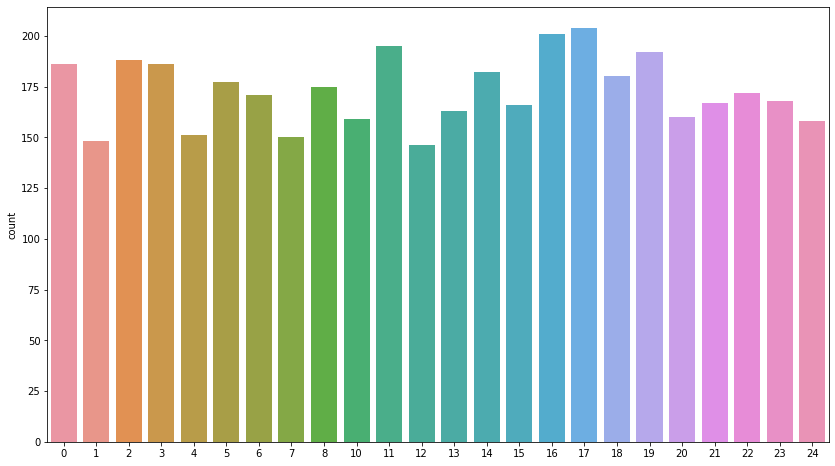

In [ ]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

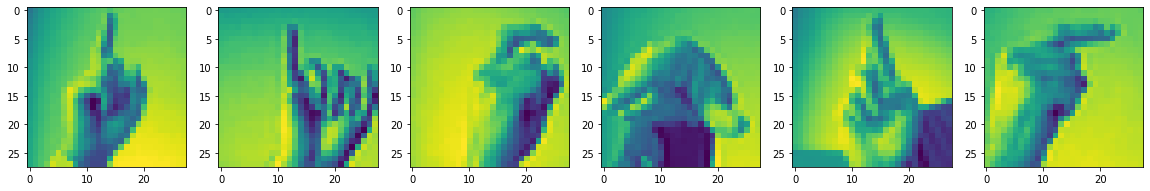

In [ ]:
f = plt.figure(figsize=(20,6))
ax=f.add_subplot(161)
ax2=f.add_subplot(162)
ax3=f.add_subplot(163)
ax4=f.add_subplot(164)
ax5=f.add_subplot(165)
ax6=f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[6].values[1:].reshape(28,28))
ax3.imshow(train.iloc[88].values[1:].reshape(28,28))
ax4.imshow(train.iloc[99].values[1:].reshape(28,28))
ax5.imshow(train.iloc[1779].values[1:].reshape(28,28))
ax6.imshow(train.iloc[2222].values[1:].reshape(28,28))
plt.show()

In [ ]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [ ]:
# Normalizing data
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(1379, 784)

In [ ]:
# Reshaping data
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(1379, 28, 28, 1)

In [ ]:
# Lebel Encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [ ]:
# spliting the dataset 80%->train , 20% -> test
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (3316, 28, 28, 1)
x_test shape (829, 28, 28, 1)
y_train shape (3316, 24)
y_test shape (829, 24)


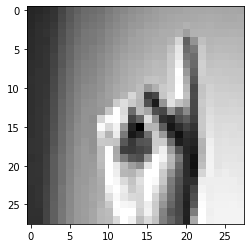

In [ ]:
plt.imshow(X_train[10][:,:,0],cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         2

In [ ]:

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 50
batch_size = 200


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=15,
        zoom_range = 0.5,
        width_shift_range=0.15,
        height_shift_range=0.15,
        horizontal_flip=True,
        vertical_flip=False)

datagen.fit(X_train)

In [ ]:
my_tensor = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
16/16 [==============================] - 51s 3s/step - loss: 3.4080 - accuracy: 0.0469 - val_loss: nan - val_accuracy: 0.0446
Epoch 2/50
16/16 [==============================] - 51s 3s/step - loss: 3.1766 - accuracy: 0.0478 - val_loss: nan - val_accuracy: 0.0483
Epoch 3/50
16/16 [==============================] - 51s 3s/step - loss: 3.1774 - accuracy: 0.0542 - val_loss: nan - val_accuracy: 0.0483
Epoch 4/50
16/16 [==============================] - 51s 3s/step - loss: 3.1706 - accuracy: 0.0568 - val_loss: nan - val_accuracy: 0.0748
Epoch 5/50
16/16 [==============================] - 51s 3s/step - loss: 3.3197 - accuracy: 0.0728 - val_loss: nan - val_accuracy: 0.0929
Epoch 6/50
16/16 [==============================] - 50s 3s/step - loss: 3.0981 - accuracy: 0.0844 - val_loss: nan - val_accuracy: 0.1242
Epoch 7/50
16/16 [==============================] - 51s 3s/step - loss: 3.0188 - accuracy: 0.1011 - va

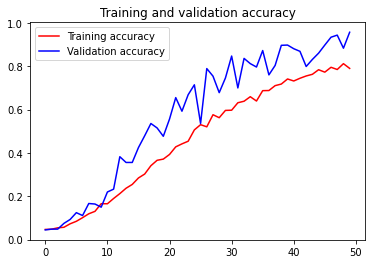

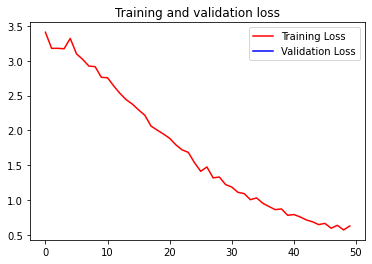

In [ ]:
acc = my_tensor.history['accuracy']
val_acc = my_tensor.history['val_accuracy']
loss = my_tensor.history['loss']
val_loss = my_tensor.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# def main():
#     while True:
# # capturing the image from webcam
#         cam_capture = cv2.VideoCapture(0)
#         _, image_frame = cam_capture.read()

# # to crop required part
#         im2 = crop_image(image_frame, 300,300,300,300)
# # convert to grayscale

#         image_grayscale = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
# # blurring the image

#         image_grayscale_blurred =cv2.GaussianBlur(image_grayscale, (15,15), 0)
# # resize the image to 28x28
#         im3 = cv2.resize(image_grayscale_blurred, (28,28), interpolation = cv2.INTER_AREA)
# # expand the dimensions from 28x28 to 1x28x28x1
#         im4 = np.resize(im3, (28, 28, 1))
#         im5 = np.expand_dims(im4, axis=0)

In [ ]:
# #model is our classifier and image is input image we are passing
# def keras_predict(model, image):
#     data = np.asarray( image, dtype="int32" )

#     pred_probab = model.predict(data)[0]
# # softmax gives probability for all the alphabets hence we have to choose the maximum probability alphabet
#     pred_class = list(pred_probab).index(max(pred_probab))
#     return max(pred_probab), pred_class